# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Create SQLAlchemy engine
connection_string = f"postgresql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}"
engine = create_engine(connection_string)  # Do not use execution_options here

# Query the database
query = "SELECT * FROM books;"

# Use raw connection if necessary
with engine.connect() as connection:
    df_books = pd.read_sql(query, connection)

# Display the DataFrame
df_books


,book_id,title,total_pages,rating,isbn,published_date,publisher_id
0,1,Lean Software Development: An Agile Toolkit,240,4.17,9780320000000,2003-05-18,5
1,2,Facing the Intelligence Explosion,91,3.87,None,2013-02-01,7
2,3,Scala in Action,419,3.74,9781940000000,2013-04-10,1
3,4,Patterns of Software: Tales from the Software ...,256,3.84,9780200000000,1996-08-15,1
4,5,Anatomy Of LISP,446,4.43,9780070000000,1978-01-01,3
5,6,Computing machinery and intelligence,24,4.17,None,2009-03-22,4
6,7,XML: Visual QuickStart Guide,269,3.66,9780320000000,2009-01-01,5
7,8,SQL Cookbook,595,3.95,9780600000000,2005-12-01,7
8,9,The Apollo Guidance Computer: Architecture And...,439,4.29,9781440000000,2010-07-01,6
9,10,Minds and Computers: An Introduction to the Ph...,222,3.54,9780750000000,2007-02-13,7


In [4]:
df_books.describe()

,book_id,total_pages,rating,publisher_id
count,10.00000,10.000000,10.000000,10.000000
mean,5.50000,300.100000,3.966000,4.600000
std,3.02765,174.566415,0.289643,2.319004
min,1.00000,24.000000,3.540000,1.000000
25%,3.25000,226.500000,3.765000,3.250000
50%,5.50000,262.500000,3.910000,5.000000
75%,7.75000,434.000000,4.170000,6.750000
max,10.00000,595.000000,4.430000,7.000000


In [5]:
# Calculate the Pearson correlation coefficient
correlation = df_books['total_pages'].corr(df_books['rating'])
print(f"Correlation between total_pages and rating: {correlation}")


Correlation between total_pages and rating: 0.1778761552255107


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Drop rows with missing values
df_books = df_books.dropna(subset=['total_pages', 'rating'])

# Separate features (X) and target (y)
X = df_books['total_pages'].values.reshape(-1, 1)  # Reshape for scikit-learn
y = df_books['rating'].values

In [9]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the predicted values
y_pred = model.predict(X)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 3.877429976347339
Coefficient: 0.0002951350338309254


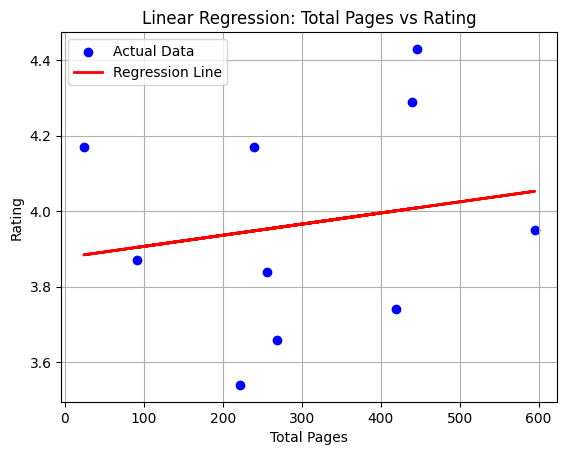

In [10]:
# Create the scatter plot
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and legend
plt.title("Linear Regression: Total Pages vs Rating")
plt.xlabel("Total Pages")
plt.ylabel("Rating")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [2]:
df_books.to_csv("../src/data/books.csv", index=False)